**Inmporting the Libraries**

In [ ]:
import numpy as np
import pandas as pd

**Reading the Dataset**

In [ ]:
adata = pd.read_csv('admission_data.csv')
adata

,Name,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance of Admit,Unnamed: 9
0,Ethen Koch,337,118,4,4.5,4.5,9.65,1,0.92,NaN
1,Diana Strong,324,107,4,4.0,4.5,8.87,1,0.76,NaN
2,Chasity Esparza,316,104,3,3.0,3.5,8.00,1,0.72,NaN
3,Armando Wallace,322,110,3,3.5,2.5,8.67,1,0.80,NaN
4,Charles Blackwell,314,103,2,2.0,3.0,8.21,0,0.65,NaN
...,...,...,...,...,...,...,...,...,...,...
495,Reid Coleman,332,108,5,4.5,4.0,9.02,1,0.87,NaN
496,Immanuel Holden,337,117,5,5.0,5.0,9.87,1,0.96,NaN
497,Kaiya Randall,330,120,5,4.5,5.0,9.56,1,0.93,NaN
498,Dominique Landry,312,103,4,4.0,5.0,8.43,0,0.73,NaN


**Getting length and shape of Dataset**

In [ ]:
print('Dataset length : ',len(adata))
print('Dataset shape : ',adata.shape)

Dataset length :  500
Dataset shape :  (500, 10)


**Finding null values**

In [ ]:
adata.isnull().sum()

Name                  0
GREScore              0
TOEFLScore            0
UniversityRating      0
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
Unnamed: 9          500
dtype: int64

**Creating a Dataframe**

In [ ]:
df = pd.DataFrame(adata)

**Dropping column with null values**

In [ ]:
df.dropna(how='all', axis='columns',inplace= True)
df

,Name,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,Ethen Koch,337,118,4,4.5,4.5,9.65,1,0.92,1
1,Diana Strong,324,107,4,4.0,4.5,8.87,1,0.76,0
2,Chasity Esparza,316,104,3,3.0,3.5,8.00,1,0.72,0
3,Armando Wallace,322,110,3,3.5,2.5,8.67,1,0.80,0
4,Charles Blackwell,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...,...
495,Reid Coleman,332,108,5,4.5,4.0,9.02,1,0.87,0
496,Immanuel Holden,337,117,5,5.0,5.0,9.87,1,0.96,1
497,Kaiya Randall,330,120,5,4.5,5.0,9.56,1,0.93,1
498,Dominique Landry,312,103,4,4.0,5.0,8.43,0,0.73,0


**Adding of new Attribute based on given condition**

In [ ]:
df['Admitted'] = [1 if Chance_of_Admit >= 0.89 else 0  for Chance_of_Admit in df['Chance of Admit ']]
df

,Name,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,Ethen Koch,337,118,4,4.5,4.5,9.65,1,0.92,1
1,Diana Strong,324,107,4,4.0,4.5,8.87,1,0.76,0
2,Chasity Esparza,316,104,3,3.0,3.5,8.00,1,0.72,0
3,Armando Wallace,322,110,3,3.5,2.5,8.67,1,0.80,0
4,Charles Blackwell,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...,...
495,Reid Coleman,332,108,5,4.5,4.0,9.02,1,0.87,0
496,Immanuel Holden,337,117,5,5.0,5.0,9.87,1,0.96,1
497,Kaiya Randall,330,120,5,4.5,5.0,9.56,1,0.93,1
498,Dominique Landry,312,103,4,4.0,5.0,8.43,0,0.73,0


**Feature Selection**

In [ ]:
x = df[['GREScore',	'TOEFLScore',	'UniversityRating',	'SOP',	'LOR',	'CGPA',	'Research']]
y = df['Admitted']

**Splitting Of Dataset in traning and testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

**Perform training with giniIndex and Creating the classifier object**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

**Perform training with entropy and Creating the classifier object**

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

**Predicton on test with giniIndex**

In [ ]:
yg_test_pred = clf_gini.predict(x_test)
print("Predicted values:")
print(yg_test_pred)

Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0]


In [ ]:
yg_train_pred = clf_gini.predict(x_train)
print("Predicted values:")
print(yg_train_pred)

Predicted values:
[0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]




**Prediction on train and test with entropy**

In [ ]:
y_test_pred = clf_entropy.predict(x_test)
print("Predicted values:")
print(y_test_pred)

Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
y_train_pred = clf_entropy.predict(x_train)
print("Predicted values:")
print(y_train_pred)

Predicted values:
[0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


**Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

print("\nEntropy")
print("Confusion Matrix : ") 
print(confusion_matrix(y_test, y_test_pred)) #entropy based prediction as parameter
print("\nGini index")
print("Confusion Matrix : ") 
print(confusion_matrix(y_test, yg_test_pred))



Entropy
Confusion Matrix : 
[[123   3]
 [  2  22]]

Gini index
Confusion Matrix : 
[[123   3]
 [  2  22]]


**Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

print("\nEntropy based accuracy")
print ("Accuracy for training data : ", accuracy_score(y_train,y_train_pred))
print ("Accuracy for testing data : ", accuracy_score(y_test,y_test_pred))
print("\nGini index based accuracy")
print ("Accuracy for training data : ", accuracy_score(y_train,yg_train_pred))
print ("Accuracy for testing data : ", accuracy_score(y_test,yg_test_pred))



Entropy based accuracy
Accuracy for training data :  0.9857142857142858
Accuracy for testing data :  0.9666666666666667

Gini index based accuracy
Accuracy for training data :  0.9857142857142858
Accuracy for testing data :  0.9466666666666667


**Generating Report of Decision Tree** 

In [ ]:
from sklearn.metrics import classification_report  

print("Report : ",classification_report(y_test, y_test_pred))

Report :                precision    recall  f1-score   support

           0       0.98      0.98      0.98       126
           1       0.88      0.92      0.90        24

    accuracy                           0.97       150
   macro avg       0.93      0.95      0.94       150
weighted avg       0.97      0.97      0.97       150



**entropy based visualization of decision tree using graphviz**

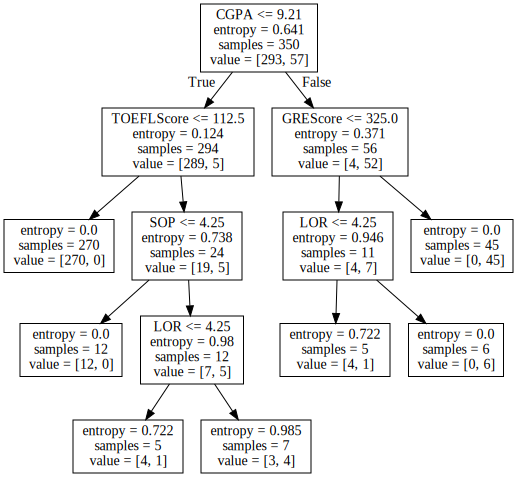

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
 
export_graphviz(clf_entropy, out_file ='tree.dot',feature_names =['GREScore',	'TOEFLScore',	'UniversityRating',	'SOP',	'LOR',	'CGPA',	'Research'])
Source.from_file("tree.dot")

**gini index based visualization of decision tree using graphviz**

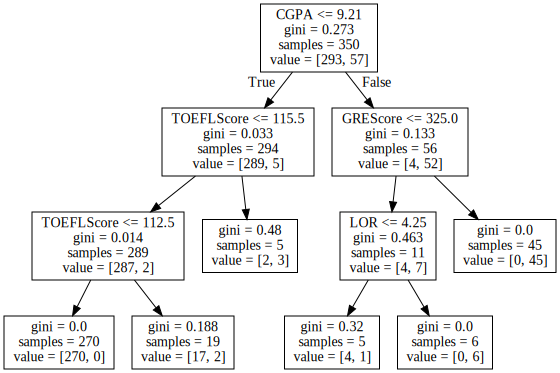

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
 
export_graphviz(clf_gini, out_file ='tree.dot',feature_names =['GREScore',	'TOEFLScore',	'UniversityRating',	'SOP',	'LOR',	'CGPA',	'Research'])
Source.from_file("tree.dot")

**entropy based visualization of decision tree using plot_tree()**

[Text(167.40000000000003, 195.696, 'X[5] <= 9.21\nentropy = 0.641\nsamples = 350\nvalue = [293, 57]'),
 Text(66.96000000000001, 152.208, 'X[1] <= 112.5\nentropy = 0.124\nsamples = 294\nvalue = [289, 5]'),
 Text(33.480000000000004, 108.72, 'entropy = 0.0\nsamples = 270\nvalue = [270, 0]'),
 Text(100.44000000000001, 108.72, 'X[3] <= 4.25\nentropy = 0.738\nsamples = 24\nvalue = [19, 5]'),
 Text(66.96000000000001, 65.232, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(133.92000000000002, 65.232, 'X[4] <= 4.25\nentropy = 0.98\nsamples = 12\nvalue = [7, 5]'),
 Text(100.44000000000001, 21.744, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(167.40000000000003, 21.744, 'entropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(267.84000000000003, 152.208, 'X[0] <= 325.0\nentropy = 0.371\nsamples = 56\nvalue = [4, 52]'),
 Text(234.36, 108.72, 'X[4] <= 4.25\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(200.88000000000002, 65.232, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]

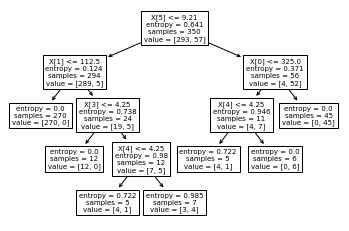

In [ ]:
from sklearn import tree

tree.plot_tree(clf_entropy)

**gini index based visualization of decision tree using plot_tree()**

[Text(186.0, 190.26, 'X[5] <= 9.21\ngini = 0.273\nsamples = 350\nvalue = [293, 57]'),
 Text(111.60000000000001, 135.9, 'X[1] <= 115.5\ngini = 0.033\nsamples = 294\nvalue = [289, 5]'),
 Text(74.4, 81.53999999999999, 'X[1] <= 112.5\ngini = 0.014\nsamples = 289\nvalue = [287, 2]'),
 Text(37.2, 27.180000000000007, 'gini = 0.0\nsamples = 270\nvalue = [270, 0]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(148.8, 81.53999999999999, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(260.40000000000003, 135.9, 'X[0] <= 325.0\ngini = 0.133\nsamples = 56\nvalue = [4, 52]'),
 Text(223.20000000000002, 81.53999999999999, 'X[4] <= 4.25\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(186.0, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(260.40000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(297.6, 81.53999999999999, 'gini = 0.0\nsamples = 45\nvalue = [0, 45]')]

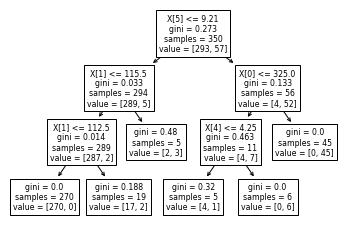

In [ ]:
from sklearn import tree

tree.plot_tree(clf_gini)